# Data Loading and Cleaning

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')  # 连接到 Google Drive

Mounted at /content/drive


In [ ]:
Bin_com = pd.read_csv('/content/drive/MyDrive/SW_data/Source/Binance - ⊱▬▬ Community ▬▬⊰ - 🌎┃global-chat [882554401154289667].csv')

In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
nltk.download('punkt_tab')
import re
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# emoticons 表情符号
def load_dict_smileys():
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }

# self defined contractions 缩写
def load_dict_contractions():
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "dont":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "isnt":"is not",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "youre":"you are",
        'yall':"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks",
        "irl":"in real life"
        }

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

def load_dict_contractions():
    return {
        "can't": "cannot",
        "won't": "will not",
        "n't": " not",
        "'re": " are",
        "'s": " is",
        "'d": " would",
        "'ll": " will",
        "'t": " not",
        "'ve": " have",
        "'m": " am"
    }

def load_dict_smileys():
    return {
        ":)": "happy",
        ":(": "sad",
        ";)": "wink"
    }

def cleaner(tweet):
    '''
    Clean twitter text for sentiment analysis.
    '''
    # Escaping HTML characters
    tweet = BeautifulSoup(tweet, "html.parser").get_text()
    # Remove @ mentions
    tweet = re.sub(r"@[A-Za-z0-9]+", "", tweet)
    # Remove # hashtags
    tweet = re.sub(r"#[A-Za-z0-9_]+", "", tweet)
    # Remove http links
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
    # Remove punctuation
    tweet = re.sub(r"[^\w\s]", "", tweet)
    # Remove numbers
    tweet = re.sub(r"\d", "", tweet)
    # Normalize CONTRACTIONS
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’", "'")
    words = tweet.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(reformed)
    # Replace emoticons with words
    SMILEY = load_dict_smileys()
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    # Remove stopwords
    manual_screen = ['nft', 'crypto']  # 自定义移除的词
    stop_words = stopwords.words('english') + manual_screen
    words = tweet.split()
    reformed = [w for w in words if w.lower() not in stop_words]
    tweet = " ".join(reformed)
    # Lemmatize and keep only English words
    lemmatizer = WordNetLemmatizer()
    words = tweet.split()
    reformed = [lemmatizer.lemmatize(w) for w in words if w.encode().isalpha()]
    tweet = " ".join(reformed)
    return tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
Bin_com['Date'] = pd.to_datetime(Bin_com['Date'])
date_filtered = Bin_com[(Bin_com['Date'] >= '2022-10-01') & (Bin_com['Date'] <= '2022-12-31')]
Bin_com_clean = date_filtered.copy()
Bin_com_clean['Cleaned_Content'] = Bin_com_clean['Content'].dropna().apply(cleaner)
print(Bin_com_clean[['Date', 'Content', 'Cleaned_Content']].head())

<ipython-input-6-b5e2d22b984f>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, "html.parser").get_text()
<ipython-input-6-b5e2d22b984f>:30: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  tweet = BeautifulSoup(tweet, "html.parser").get_text()


                                  Date  \
56485 2022-10-01 00:00:07.974000+08:00   
56486 2022-10-01 00:00:16.287000+08:00   
56487 2022-10-01 02:14:42.612000+08:00   
56488 2022-10-01 02:14:49.111000+08:00   
56489 2022-10-01 02:49:29.112000+08:00   

                                                 Content  \
56485  If you need help or you have an inquiry please...   
56486         You can report scammers in #🚨┃report-scams   
56487                what can i do with the points i win   
56488                                         in battles   
56489                                                Idk   

                                         Cleaned_Content  
56485  need help inquiry please ask question communit...  
56486                         report scammer reportscams  
56487                                          point win  
56488                                             battle  
56489                                                Idk  


# Word Frequency

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


Bin_com['Date'] = pd.to_datetime(Bin_com['Date'])
date_filtered = Bin_com[(Bin_com['Date'] >= '2022-09-01') & (Bin_com['Date'] <= '2023-01-31')]

Bin_com_clean = date_filtered.copy()
Bin_com_clean['Cleaned_Content'] = Bin_com_clean['Content'].dropna()

# 将数据分为两个时间段
first_range = Bin_com_clean[(Bin_com_clean['Date'] >= '2022-09-01') & (Bin_com_clean['Date'] <= '2022-11-11')]
second_range = Bin_com_clean[(Bin_com_clean['Date'] > '2022-11-11') & (Bin_com_clean['Date'] <= '2023-01-31')]

first_range['Cleaned_Content'] = first_range['Content'].dropna().apply(cleaner)
second_range['Cleaned_Content'] = second_range['Content'].dropna().apply(cleaner)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
<ipython-input-6-b5e2d22b984f>:30: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  tweet = BeautifulSoup(tweet, "html.parser").get_text()
<ipython-input-6-b5e2d22b984f>:30: MarkupResemblesLocatorWarning: The input looks more like a URL than markup. You may want to use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  tweet = BeautifulSoup(tweet, "html.parser").get_te

In [ ]:
def analyze_word_frequency(data, column):
    all_words = []
    for content in data[column].dropna():
        words = word_tokenize(content)
        lowered_words = [word.lower() for word in words]
        all_words.extend(lowered_words)
    fdist = nltk.FreqDist(all_words)
    return pd.DataFrame(fdist.most_common(50), columns=['word', 'count'])


word_freq_first = analyze_word_frequency(first_range, 'Cleaned_Content')
word_freq_second = analyze_word_frequency(second_range, 'Cleaned_Content')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


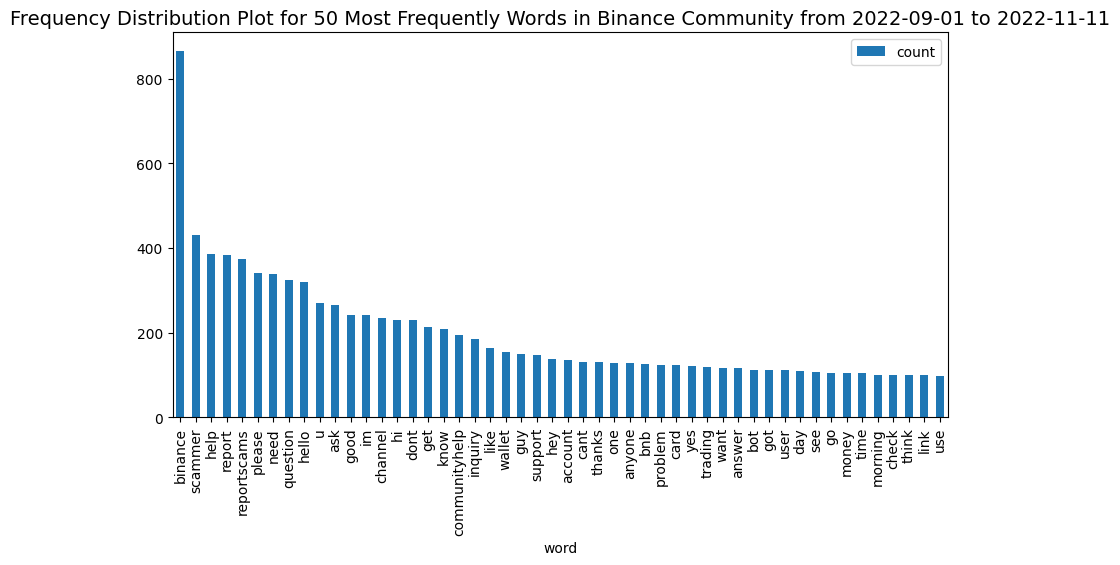

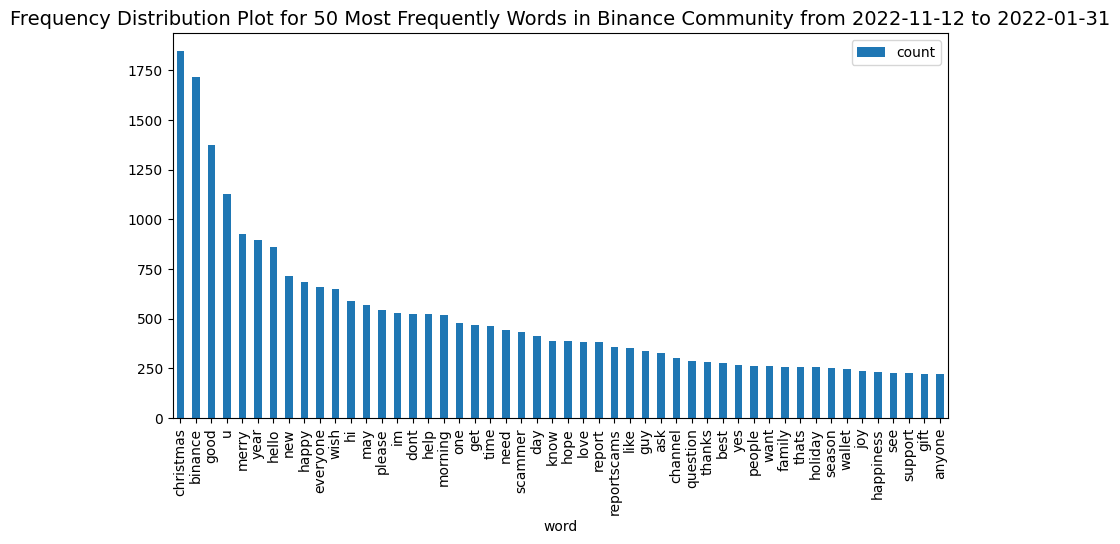

In [ ]:
# 绘制第一个时间段的图
fig, ax = plt.subplots(figsize=(10, 5))
word_freq_first.sort_values(by='count', ascending=False).plot.bar(x='word', y='count', ax=ax)
ax.set_title("Frequency Distribution Plot for 50 Most Frequently Words in Binance Community from 2022-09-01 to 2022-11-11", fontsize=14)
plt.show()

# 绘制第二个时间段的图
fig, ax = plt.subplots(figsize=(10, 5))
word_freq_second.sort_values(by='count', ascending=False).plot.bar(x='word', y='count', ax=ax)
ax.set_title("Frequency Distribution Plot for 50 Most Frequently Words in Binance Community from 2022-11-12 to 2022-01-31",  fontsize=14)
plt.show()

# LDA

In [ ]:
! pip install gensim
! pip install pyLDAvis

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import re
import networkx as nx
import matplotlib.pyplot as plt
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim_models
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(
    analyzer='word',
    min_df=200,# minimum required occurences of a word
    stop_words='english',# remove stop words
    lowercase=True,# convert all words to lowercase
    token_pattern='[a-zA-Z0-9]{3,}',# num of chars need to be > 3
    max_features=1000,# max number of unique words
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
from gensim.models import CoherenceModel
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics
    start : Starting number of topics
    step : Topic number increasement size

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def filter_by_date(df, start_date, end_date):
    """
    根据指定时间范围筛选数据。
    :return: 筛选后的数据框
    """
    df['Date'] = pd.to_datetime(df['Date'])
    return df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
start_date = "2022-09-01"
end_date = "2022-11-11"
Bin_com_filtered_pre = filter_by_date(Bin_com_clean, start_date, end_date)
Bin_com_clean_pre = Bin_com_filtered_pre.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
start_date = "2022-11-11"
end_date = "2023-01-31"
Bin_com_filtered_aft = filter_by_date(Bin_com_clean, start_date, end_date)
Bin_com_clean_aft = Bin_com_filtered_aft.copy()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def compute_coherence_values(dictionary, corpus, texts, start, limit, step):
    """
    计算不同主题数目的 LDA 模型的 Coherence Score
    """
    from gensim.models import CoherenceModel
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaModel(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=num_topics,
                                       random_state=42,
                                       update_every=1,
                                       passes=10,
                                       alpha='auto',
                                       per_word_topics=True)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Before FTX Collapse

In [ ]:
import gensim.corpora as corpora
texts_pre = Bin_com_clean_pre['Cleaned_Content'].dropna().apply(lambda x: str(x).split(' ')).values
id2word = corpora.Dictionary(texts_pre)
corpus = [id2word.doc2bow(text) for text in texts_pre]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
start = 2
limit = 50
step = 6
model_list_pre, coherence_values_pre = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts_pre, start=start, limit=limit, step=step)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


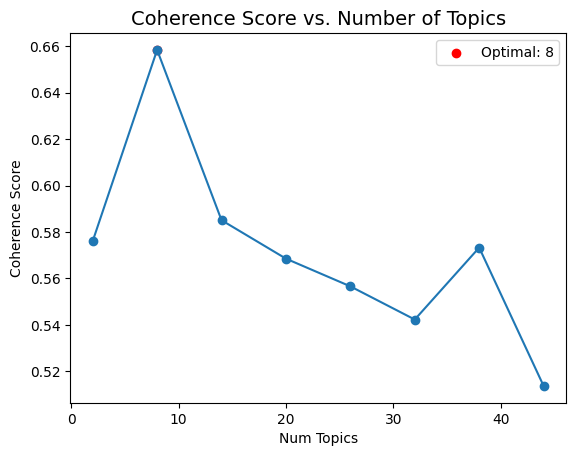

Optimal Number of Topics: 8
Maximum Coherence Score: 0.6584130762815262


In [ ]:
x = range(start, limit, step)
max_coherence_pre = max(coherence_values_pre)
optimal_x = start + coherence_values_pre.index(max_coherence_pre) * step


plt.plot(x, coherence_values_pre, marker='o')
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics", fontsize=14)
plt.legend(["Coherence Score"], loc='best')
plt.scatter(optimal_x, max_coherence_pre, color='red', label=f'Optimal: {optimal_x}')
plt.legend(loc='best')
plt.show()

print(f"Optimal Number of Topics: {optimal_x}")
print(f"Maximum Coherence Score: {max_coherence_pre}")

In [ ]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
data_matrix = vectorizer.fit_transform(Bin_com_clean_pre['Cleaned_Content'].dropna()).toarray()

lda = LatentDirichletAllocation(n_components=9, random_state=0)
lda.fit(data_matrix)

pyLDAvis_data = pyLDAvis.prepare(
    topic_term_dists=lda.components_,
    doc_topic_dists=lda.transform(data_matrix),
    doc_lengths=np.sum(data_matrix, axis=1),
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=np.sum(data_matrix, axis=0)
)

pyLDAvis.display(pyLDAvis_data)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i, topic in enumerate(lda.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])  # 使用 get_feature_names_out() 获取词汇
    print('\n')

Top 10 words for topic #0:
['think', 'like', 'trade', 'yeah', 'binance', 'got', 'just', 'know', 'don', 'hello']


Top 10 words for topic #1:
['dm', 'server', 'just', 'discord', 'check', 'ok', 'link', 'binance', 'guys', 'thanks']


Top 10 words for topic #2:
['know', 'nft', 'problem', 'buy', 'use', 'make', 'crypto', 'money', 'account', 'binance']


Top 10 words for topic #3:
['contact', 'answer', 'bot', 'chat', 'www', 'en', 'support', 'https', 'com', 'binance']


Top 10 words for topic #4:
['deleted', 'love', 'did', 'inquiry', 'community', 'channel', 'ask', 'question', 'need', 'help']


Top 10 words for topic #5:
['right', 'dont', 'doing', 'spot', 'address', 'lol', 'bnb', 'thank', 'yes', 'wallet']


Top 10 words for topic #6:
['favorite', 'bro', 'binanceblockchainweek', 'yo', 'moment', 'welcome', 'gm', 'scams', 'scammers', 'report']


Top 10 words for topic #7:
['crypto', 'earn', 'support', 'announcement', 'www', 'en', 'com', 'https', 'hi', 'binance']


Top 10 words for topic #8:
['im',

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## After FTX Collapse

In [ ]:
import gensim.corpora as corpora
texts_aft = Bin_com_clean_aft['Cleaned_Content'].dropna().apply(lambda x: str(x).split(' ')).values
id2word = corpora.Dictionary(texts_aft)
corpus = [id2word.doc2bow(text) for text in texts_aft]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
start = 2
limit = 50
step = 6
model_list_aft, coherence_values_aft = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=texts_aft, start=start, limit=limit, step=step)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


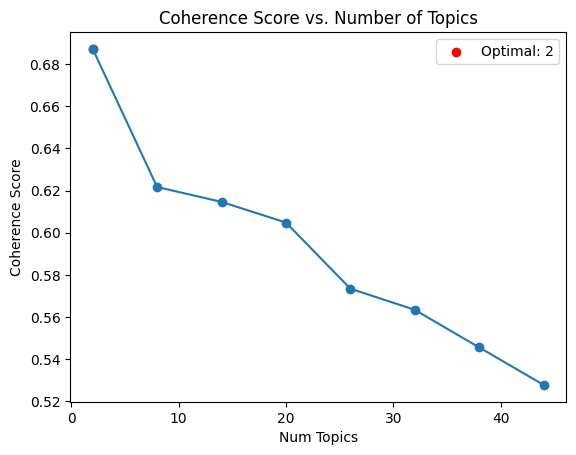

Optimal Number of Topics: 2
Maximum Coherence Score: 0.6871487867871237


In [ ]:
x = range(start, limit, step)
max_coherence_aft = max(coherence_values_aft)
optimal_x = start + coherence_values_aft.index(max_coherence_aft) * step


plt.plot(x, coherence_values_aft, marker='o')
plt.xlabel("Num Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.legend(["Coherence Score"], loc='best')
plt.scatter(optimal_x, max_coherence_aft, color='red', label=f'Optimal: {optimal_x}')
plt.legend(loc='best')
plt.show()

print(f"Optimal Number of Topics: {optimal_x}")
print(f"Maximum Coherence Score: {max_coherence_aft}")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


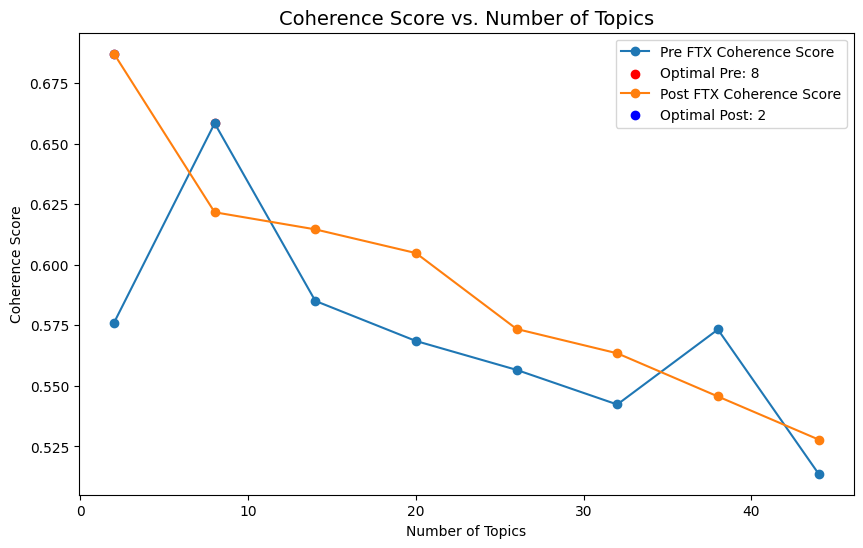

Pre Optimal Number of Topics: 8
Pre Maximum Coherence Score: 0.6584130762815262
Post Optimal Number of Topics: 2
Post Maximum Coherence Score: 0.6871487867871237


In [ ]:
max_coherence_pre = max(coherence_values_pre)
optimal_x_pre = start + coherence_values_pre.index(max_coherence_pre) * step

max_coherence_aft = max(coherence_values_aft)
optimal_x_aft = start + coherence_values_aft.index(max_coherence_aft) * step


plt.figure(figsize=(10, 6))


plt.plot(x, coherence_values_pre, marker='o', label="Pre FTX Coherence Score")
plt.scatter(optimal_x_pre, max_coherence_pre, color='red', label=f'Optimal Pre: {optimal_x_pre}')


plt.plot(x, coherence_values_aft, marker='o', label="Post FTX Coherence Score")
plt.scatter(optimal_x_aft, max_coherence_aft, color='blue', label=f'Optimal Post: {optimal_x_aft}')

plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics", fontsize=14)
plt.legend(loc='best')

plt.show()

print(f"Pre Optimal Number of Topics: {optimal_x_pre}")
print(f"Pre Maximum Coherence Score: {max_coherence_pre}")
print(f"Post Optimal Number of Topics: {optimal_x_aft}")
print(f"Post Maximum Coherence Score: {max_coherence_aft}")

In [ ]:
vectorizer = CountVectorizer(stop_words='english', max_features=1000)
data_matrix = vectorizer.fit_transform(Bin_com_clean_aft['Cleaned_Content'].dropna()).toarray()

lda = LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(data_matrix)

pyLDAvis_data = pyLDAvis.prepare(
    topic_term_dists=lda.components_,
    doc_topic_dists=lda.transform(data_matrix),
    doc_lengths=np.sum(data_matrix, axis=1),
    vocab=vectorizer.get_feature_names_out(),
    term_frequency=np.sum(data_matrix, axis=0)
)

pyLDAvis.display(pyLDAvis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for i, topic in enumerate(lda.components_):
    print(f'Top 10 words for topic #{i}:')
    print([vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])  # 使用 get_feature_names_out() 获取词汇
    print('\n')

Top 10 words for topic #0:
['just', 'really', 'think', 'got', 'lol', 'yeah', 'time', 'don', 'thanks', 'know']


Top 10 words for topic #1:
['did', 'trade', 'just', 'bro', 'ur', 'money', 'gift', 'like', 'thank', 'hey']


Top 10 words for topic #2:
['group', 'right', 'nice', 'mean', 'telegram', 'people', 'gm', 'scams', 'scammers', 'report']


Top 10 words for topic #3:
['binancians', 'day', 'ok', 'doing', 'evening', 'ex_binance', 'guys', 'morning', 'hi', 'good']


Top 10 words for topic #4:
['market', 'buy', 'post', 'inquiry', 'question', 'channel', 'community', 'ask', 'need', 'help']


Top 10 words for topic #5:
['hope', 'binance', 'love', 'wish', 'happy', 'new', 'year', 'merry', 'binancechristmas', 'christmas']


Top 10 words for topic #6:
['discord', 'admin', 'community', 'best', 'dm', 'scam', 'binance', 'just', 'yes', 'hello']


Top 10 words for topic #7:
['crypto', 'use', 'wallet', 'nft', 'www', 'en', 'support', 'https', 'com', 'binance']




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Network Analysis

In [ ]:
import pandas as pd
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
texts_pre = Bin_com_clean_pre['Cleaned_Content'].dropna().tolist()
texts_aft = Bin_com_clean_aft['Cleaned_Content'].dropna().tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
def calculate_bigram(texts):
    bigrams = []
    for text in texts:
        token = word_tokenize(text)
        token = [i for i in token if len(i) > 2]
        bigram = list(ngrams(token, 2))
        bigrams.extend(bigram)


    bi_count = dict(Counter(bigrams))

    df = pd.DataFrame.from_dict(bi_count, orient='index').reset_index()
    df.columns = ['bigram', 'count']
    return df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
bigram_df_pre = calculate_bigram(texts_pre)
top_bigrams_pre = bigram_df_pre.sort_values(by='count', ascending=False).iloc[:25]
print(top_bigrams_pre)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                  bigram  count
0                             (You, can)    408
1                          (can, report)    361
2                     (report, scammers)    357
3             (scammers, 🚨┃report-scams)    357
7                            (you, have)    228
6                            (help, you)    212
4                            (you, need)    207
5                           (need, help)    192
12                      (your, question)    190
13                       (question, the)    190
10                         (please, ask)    189
11                           (ask, your)    188
14               (the, 🆘┃community-help)    187
15           (🆘┃community-help, channel)    187
8                        (have, inquiry)    186
9                      (inquiry, please)    186
56                            (you, can)    101
98                            (for, the)     86
2080  (https, //www.binance.com/en/chat)     62
268                          (you, will)

In [ ]:
bigram_df_aft = calculate_bigram(texts_aft)
top_bigrams_aft = bigram_df_aft.sort_values(by='count', ascending=False).iloc[:25]
print(top_bigrams_aft)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                            bigram  count
14809           (Merry, Christmas)    704
0                       (You, can)    393
914                (Good, morning)    346
1                    (can, report)    331
3       (scammers, 🚨┃report-scams)    326
2               (report, scammers)    326
7                      (you, have)    308
273                     (for, the)    234
9620                   (new, year)    223
11159                  (New, Year)    218
15378             (Christmas, and)    203
6                      (help, you)    194
5                     (need, help)    193
4                      (you, need)    190
706                     (are, you)    182
6296                    (you, all)    178
12                (your, question)    173
166                     (you, can)    171
11                     (ask, your)    168
13                 (question, the)    166
14         (the, 🆘┃community-help)    166
15     (🆘┃community-help, channel)    165
9                (inquiry, please)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graph now has 6648 nodes and 27496 edges
G_sub now has 100 nodes and 1992 edges


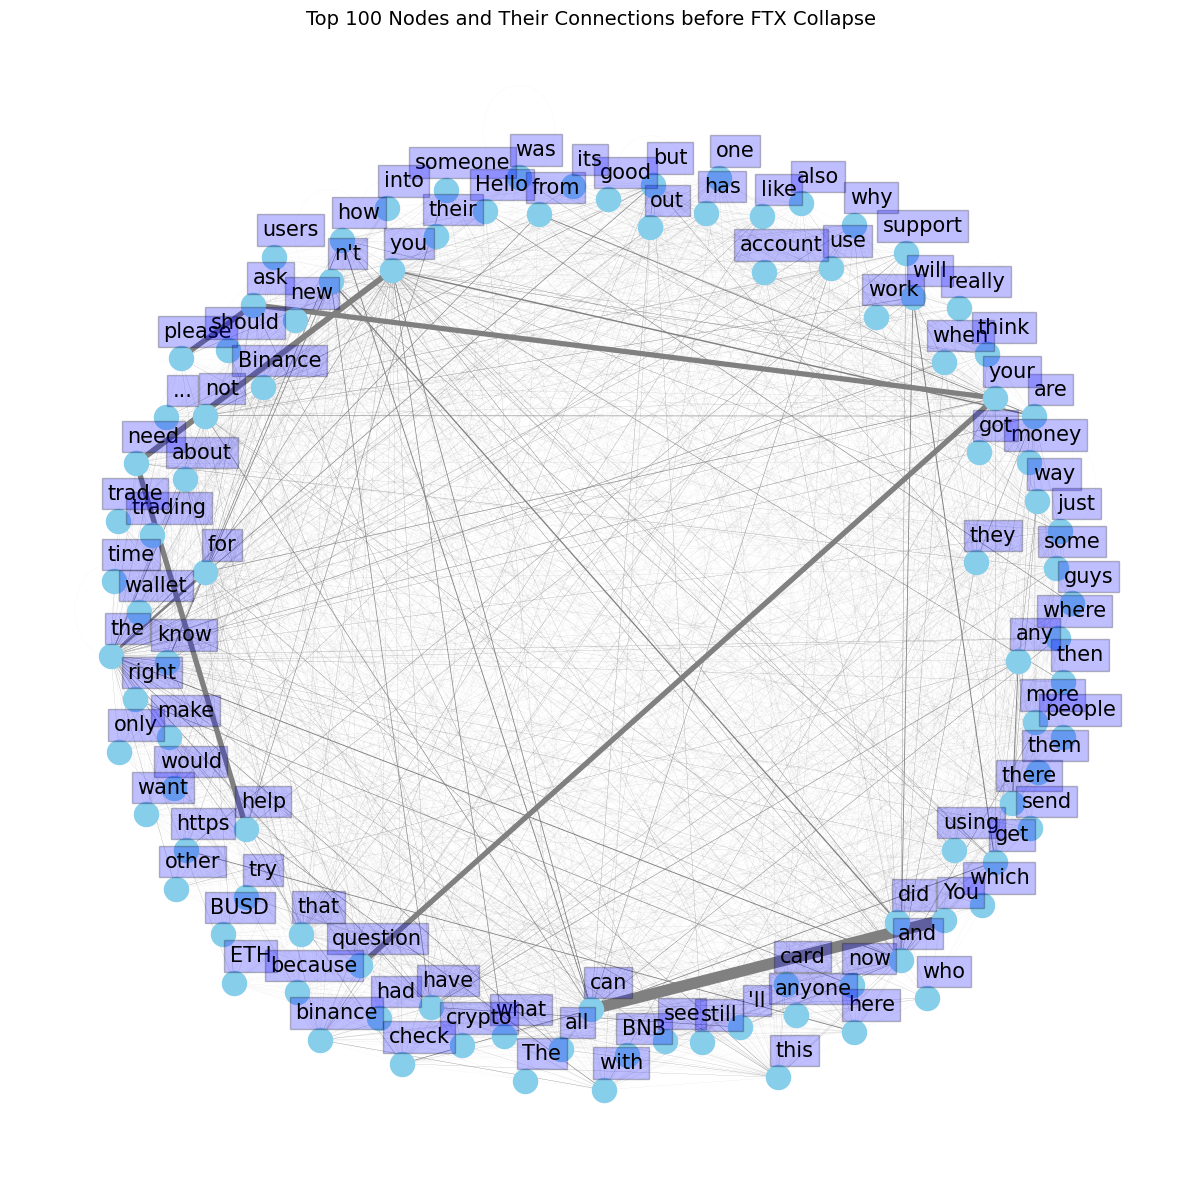

In [ ]:
G_word = nx.Graph()
for _, row in bigram_df_pre.iterrows():
    bigram = row['bigram']
    count = row['count']
    G_word.add_edge(bigram[0], bigram[1], weight=(count / 1000))

print('Graph now has', len(G_word.nodes()), 'nodes and', len(G_word.edges()), 'edges')
top_nodes = sorted(G_word.degree, key=lambda x: x[1], reverse=True)[:100]
to_keep = [node[0] for node in top_nodes]
G_word_sub = G_word.subgraph(to_keep)
print('G_sub now has', len(G_word_sub.nodes()), 'nodes and', len(G_word_sub.edges()), 'edges')
fig, ax = plt.subplots(figsize=(15, 15))

pos = nx.spring_layout(G_word_sub,k=10) # spring layout
edgewidth = [d['weight']*20 for (u,v,d) in G_word_sub.edges(data=True)]
nodesize = [[]]
textsize = []


nx.draw_networkx(G_word_sub, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='grey',
                 node_color='skyblue',
                 with_labels = False,
                 ax=ax)

plt.grid(None)
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.25), #text box color
            horizontalalignment='center', fontsize=15)
plt.title("Top 100 Nodes and Their Connections before FTX Collapse", fontsize=14)
plt.box(False)
plt.grid(False)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Graph now has 10937 nodes and 54649 edges
G_sub now has 100 nodes and 2688 edges


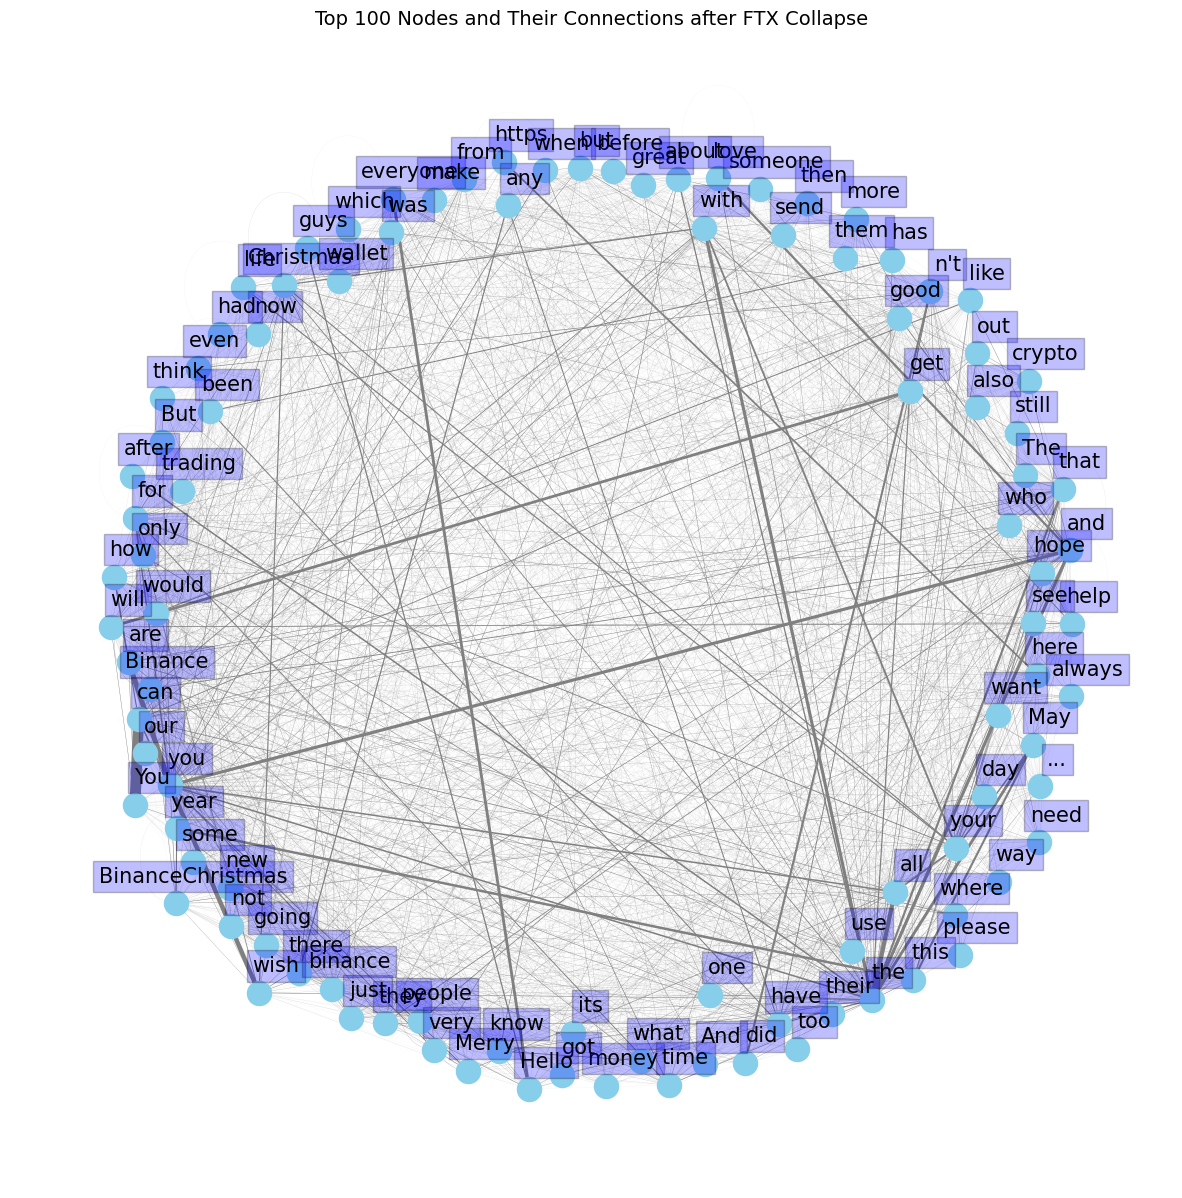

In [ ]:
G_word = nx.Graph()
for _, row in bigram_df_aft.iterrows():
    bigram = row['bigram']
    count = row['count']
    G_word.add_edge(bigram[0], bigram[1], weight=(count / 1000))

print('Graph now has', len(G_word.nodes()), 'nodes and', len(G_word.edges()), 'edges')
top_nodes = sorted(G_word.degree, key=lambda x: x[1], reverse=True)[:100]
to_keep = [node[0] for node in top_nodes]
G_word_sub = G_word.subgraph(to_keep)
print('G_sub now has', len(G_word_sub.nodes()), 'nodes and', len(G_word_sub.edges()), 'edges')
fig, ax = plt.subplots(figsize=(15, 15))

pos = nx.spring_layout(G_word_sub,k=10) # spring layout
edgewidth = [d['weight']*20 for (u,v,d) in G_word_sub.edges(data=True)]
nodesize = [[]]
textsize = []


nx.draw_networkx(G_word_sub, pos,
                 font_size=10,
                 width=edgewidth,
                 edge_color='grey',
                 node_color='skyblue',
                 with_labels = False,
                 ax=ax)

plt.grid(None)
for key, value in pos.items():
    x, y = value[0]+0.035, value[1]+0.045
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor='blue', alpha=0.25), #text box color
            horizontalalignment='center', fontsize=15)
plt.title("Top 100 Nodes and Their Connections after FTX Collapse", fontsize=14)
plt.box(False)
plt.grid(False)
plt.show()